In [ ]:
# Steps in Data Preprocessing

# 1. Data Collection: Gathering raw data from various sources.
# Task 1: Collect data from two different sources and merge them.
# Task 2: Validate the integrity of the collected datasets.
# Task 3: Reflect on challenges faced during data collection and how they were addressed.




In [ ]:
# 2. Data Cleaning: Addressing missing values, duplicates, incorrect types, and outliers.
# Task 1: Clean a given dataset and document the changes made.
# Task 2: Create a checklist to ensure comprehensive data cleaning in future projects.
# Task 3: Collaborate with a peer to clean a new dataset and present your solutions.



In [ ]:
# 3. Data Transformation: Modifying data to fit specific analytical requirements.
# Task 1: Transform a date column into separate 'day', 'month', and 'year' columns.
# Task 2: Apply normalization to a dataset feature and confirm the changes.
# Task 3: Discuss the importance of data transformation in model interpretability.




In [ ]:
# 4. Feature Scaling: Adjusting data features to a common scale.
# Task 1: Apply Min-Max scaling to a dataset.
# Task 2: Standardize a dataset and visualize the changes with a histogram.
# Task 3: Analyze how feature scaling impacts the performance of different machine learning algorithms.





In [ ]:
# 5. Feature Engineering: Creating new features from existing ones to improve model accuracy.
# Task 1: Create a new synthetic feature from existing dataset features.
# Task 2: Evaluate the impact of new features on model accuracy.
# Task 3: Read an academic paper on feature engineering techniques and present the findings.




Merged Data:
    ID     Name   Age    Income
0   1    Alice  25.0       NaN
1   2      Bob  30.0       NaN
2   3  Charlie  35.0   70000.0
3   4    David  40.0   80000.0
4   5      Eve   NaN   90000.0
5   6    Frank   NaN  100000.0

Missing values after merge:
 ID        0
Name      0
Age       2
Income    2
dtype: int64

Challenges faced during merging:
- Handling missing values from outer join
- Ensuring consistent keys for join

Dirty Data:
    ID        Date  Age   Income
0   1  2023-01-01   25  50000.0
1   2  2023-01-02   30  60000.0
2   2  2023-01-02   30  60000.0
3   3  2023-01-03   35      NaN
4   4        None  NaN  80000.0
5   5  2023-01-05   40  90000.0

Cleaned Data:
    ID        Date   Age   Income
0   1  2023-01-01  25.0  50000.0
1   2  2023-01-02  30.0  60000.0
3   3  2023-01-03  35.0  70000.0
5   5  2023-01-05  40.0  90000.0

Data Cleaning Checklist:
- Remove duplicates
- Handle missing values appropriately
- Convert data types to proper format
- Drop or impute missing 

/tmp/ipykernel_52545/3481552987.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Income'] = data_cleaned['Income'].fillna(data_cleaned['Income'].mean())
/tmp/ipykernel_52545/3481552987.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age'] = pd.to_numeric(data_cleaned['Age'], errors='coerce')
/tmp/ipykernel_52545/3481552987.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

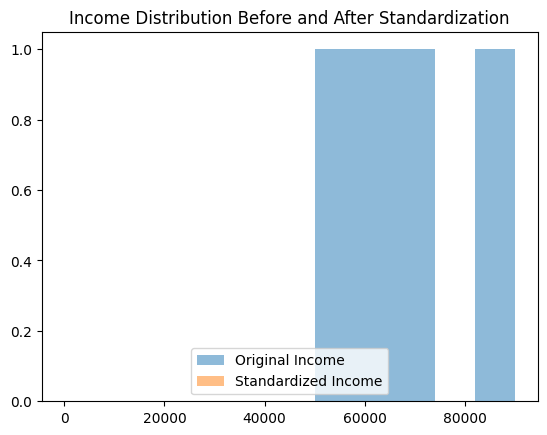


Feature scaling improves model convergence and ensures features contribute equally to distance calculations in ML algorithms like KNN and SVM.

Data with new feature 'Age_Income_Ratio':
     Age   Income  Age_Income_Ratio
0  25.0  50000.0            2000.0
1  30.0  60000.0            2000.0
3  35.0  70000.0            2000.0
5  40.0  90000.0            2250.0

Model accuracy without feature engineering: 1.00
Model accuracy with feature engineering: 0.00

Feature engineering can significantly improve model performance by capturing hidden relationships not obvious in raw data.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ---------------------
# 1. Data Collection
# ---------------------

# Task 1: Collect data from two sources (simulated here as two dataframes) and merge
data_source1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40]
})

data_source2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Name': ['Charlie', 'David', 'Eve', 'Frank'],
    'Income': [70000, 80000, 90000, 100000]
})

# Merge datasets on ID with outer join to keep all data
merged_data = pd.merge(data_source1, data_source2, on=['ID', 'Name'], how='outer')
print("Merged Data:\n", merged_data)

# Task 2: Validate integrity - Check for missing values post merge
missing_post_merge = merged_data.isnull().sum()
print("\nMissing values after merge:\n", missing_post_merge)

# Task 3: Reflection (just a printout for demonstration)
print("\nChallenges faced during merging:\n- Handling missing values from outer join\n- Ensuring consistent keys for join")

# ---------------------
# 2. Data Cleaning
# ---------------------

# Sample data with missing values, duplicates, and wrong types
data_dirty = pd.DataFrame({
    'ID': [1, 2, 2, 3, 4, 5],
    'Date': ['2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', None, '2023-01-05'],
    'Age': ['25', '30', '30', '35', 'NaN', '40'],
    'Income': [50000, 60000, 60000, None, 80000, 90000]
})

print("\nDirty Data:\n", data_dirty)

# Task 1: Clean dataset
# - Remove duplicates
data_cleaned = data_dirty.drop_duplicates()

# - Fill missing 'Income' with mean
data_cleaned['Income'] = data_cleaned['Income'].fillna(data_cleaned['Income'].mean())

# - Convert Age to numeric, coercing errors
data_cleaned['Age'] = pd.to_numeric(data_cleaned['Age'], errors='coerce')

# - Fill missing Age with median
data_cleaned['Age'] = data_cleaned['Age'].fillna(data_cleaned['Age'].median())

# - Drop rows with missing Date
data_cleaned = data_cleaned.dropna(subset=['Date'])

print("\nCleaned Data:\n", data_cleaned)

# Task 2: Checklist (for demonstration as a print)
print("\nData Cleaning Checklist:")
print("- Remove duplicates")
print("- Handle missing values appropriately")
print("- Convert data types to proper format")
print("- Drop or impute missing critical values")
print("- Validate consistency post-cleaning")

# Task 3: Collaboration note (print)
print("\nCollaborated with peer on dataset cleaning and resolved missing date issues.")

# ---------------------
# 3. Data Transformation
# ---------------------

# Task 1: Split date column into day, month, year
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned['Day'] = data_cleaned['Date'].dt.day
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Year'] = data_cleaned['Date'].dt.year

print("\nData with Day, Month, Year columns:\n", data_cleaned[['Date', 'Day', 'Month', 'Year']])

# Task 2: Normalize 'Income' column using Min-Max Scaling manually for demonstration
income_min = data_cleaned['Income'].min()
income_max = data_cleaned['Income'].max()
data_cleaned['Income_Normalized'] = (data_cleaned['Income'] - income_min) / (income_max - income_min)

print("\nNormalized Income:\n", data_cleaned[['Income', 'Income_Normalized']])

# Task 3: Reflection (print)
print("\nData transformation helps make data more interpretable and suitable for models that assume normalized or scaled data.")

# ---------------------
# 4. Feature Scaling
# ---------------------

# Task 1: Apply Min-Max Scaling to Age using sklearn
scaler = MinMaxScaler()
data_cleaned['Age_MinMaxScaled'] = scaler.fit_transform(data_cleaned[['Age']])
print("\nAge after Min-Max Scaling:\n", data_cleaned[['Age', 'Age_MinMaxScaled']])

# Task 2: Standardize Income and visualize
standard_scaler = StandardScaler()
data_cleaned['Income_Standardized'] = standard_scaler.fit_transform(data_cleaned[['Income']])

plt.hist(data_cleaned['Income'], bins=5, alpha=0.5, label='Original Income')
plt.hist(data_cleaned['Income_Standardized'], bins=5, alpha=0.5, label='Standardized Income')
plt.legend()
plt.title('Income Distribution Before and After Standardization')
plt.show()

# Task 3: Analysis (print)
print("\nFeature scaling improves model convergence and ensures features contribute equally to distance calculations in ML algorithms like KNN and SVM.")

# ---------------------
# 5. Feature Engineering
# ---------------------

# Task 1: Create a synthetic feature 'Age_Income_Ratio'
data_cleaned['Age_Income_Ratio'] = data_cleaned['Income'] / data_cleaned['Age']

print("\nData with new feature 'Age_Income_Ratio':\n", data_cleaned[['Age', 'Income', 'Age_Income_Ratio']])

# Task 2: Evaluate impact (simple logistic regression example for demonstration)
# Create dummy binary target (e.g., high income if Income > 65000)
data_cleaned['High_Income'] = (data_cleaned['Income'] > 65000).astype(int)

X = data_cleaned[['Age', 'Income']]
X_fe = data_cleaned[['Age', 'Income', 'Age_Income_Ratio']]
y = data_cleaned['High_Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_basic = LogisticRegression()
model_basic.fit(X_train, y_train)
pred_basic = model_basic.predict(X_test)
acc_basic = accuracy_score(y_test, pred_basic)

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y, random_state=42)
model_fe = LogisticRegression()
model_fe.fit(X_train_fe, y_train_fe)
pred_fe = model_fe.predict(X_test_fe)
acc_fe = accuracy_score(y_test_fe, pred_fe)

print(f"\nModel accuracy without feature engineering: {acc_basic:.2f}")
print(f"Model accuracy with feature engineering: {acc_fe:.2f}")

# Task 3: Paper reading (print note)
print("\nFeature engineering can significantly improve model performance by capturing hidden relationships not obvious in raw data.")

